### Books Recommender system using clustering | Collaborative based

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('data/BX-Books.csv', sep=';', on_bad_lines='skip', encoding='latin-1')
users = pd.read_csv('data/BX-Users.csv', sep=';', on_bad_lines='skip', encoding='latin-1')
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', on_bad_lines='skip', encoding='latin-1')

C:\Users\Malhar\AppData\Local\Temp\ipykernel_7944\1128168849.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('data/BX-Books.csv', sep=';', on_bad_lines='skip', encoding='latin-1')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [5]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
               'Image-URL-L']]

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books.rename(columns={
    "Book-Title":"Title",
    "Book-Author":"Author",
    "Year-Of-Publication":"Year",
    "Image-URL-L":"img_url"
}, inplace=True)

In [8]:
books.head()

,ISBN,Title,Author,Year,Publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [9]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 6)
(278858, 3)
(1149780, 3)


In [12]:
ratings.rename(columns={
    "User-ID":"User_ID",
    "Book-Rating":"Rating"
}, inplace=True)

In [13]:
ratings['User_ID'].value_counts()

User_ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

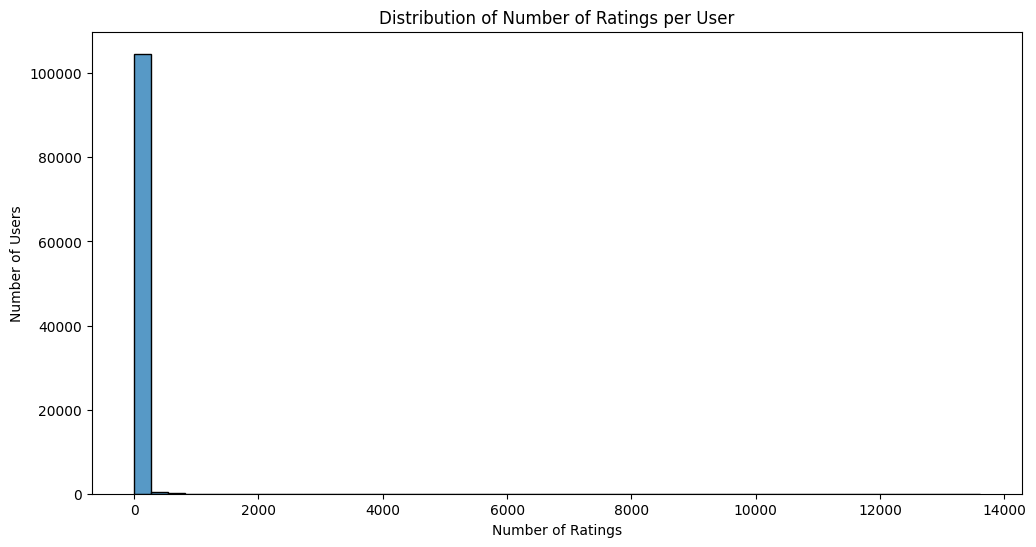

In [14]:
user_rating_counts = ratings['User_ID'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(user_rating_counts, bins=50, kde=False)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Ratings per User')
plt.show()

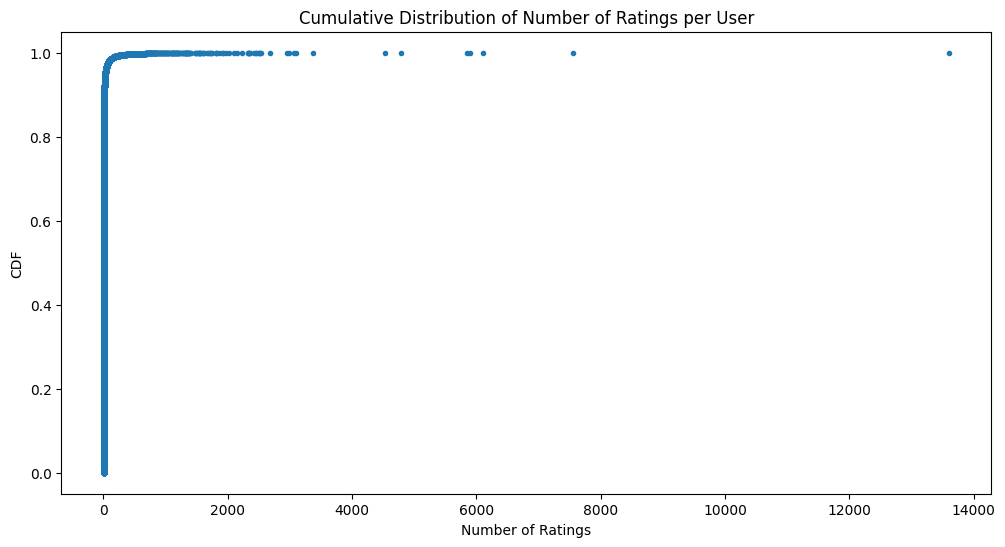

In [15]:
sorted_counts = np.sort(user_rating_counts)
cdf = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)

plt.figure(figsize=(12, 6))
plt.plot(sorted_counts, cdf, marker='.', linestyle='none')
plt.xlabel('Number of Ratings')
plt.ylabel('CDF')
plt.title('Cumulative Distribution of Number of Ratings per User')
plt.show()

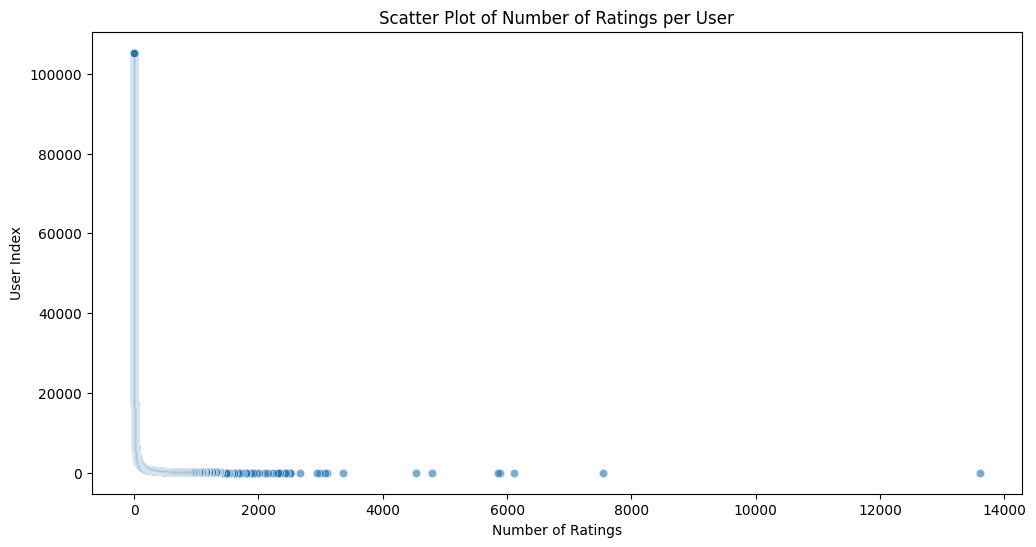

In [16]:
user_rating_counts = ratings['User_ID'].value_counts().reset_index()
user_rating_counts.columns = ['User_ID', 'Number_of_Ratings']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number_of_Ratings', y=user_rating_counts.index, data=user_rating_counts, alpha=0.6)
plt.xlabel('Number of Ratings')
plt.ylabel('User Index')
plt.title('Scatter Plot of Number of Ratings per User')
plt.show()

In [17]:
ratings['User_ID'].unique()

array([276725, 276726, 276727, ..., 276709, 276721, 276723], dtype=int64)

In [18]:
unique_user_count = ratings['User_ID'].nunique()
print(f"Number of unique users: {unique_user_count}")

Number of unique users: 105283


In [19]:
x = ratings['User_ID'].value_counts() > 100

In [20]:
x[x].shape

(1825,)

In [21]:
y = x[x].index
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       238186,  99441, 187410, 262070,  70183,  40553,  39345, 266283, 189666,
       140879],
      dtype='int64', name='User_ID', length=1825)

In [22]:
ratings = ratings[ratings['User_ID'].isin(y)]

In [23]:
ratings.head()

,User_ID,ISBN,Rating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0


In [24]:
ratings.shape

(656605, 3)

In [25]:
rwb = ratings.merge(books, on="ISBN")

In [26]:
rwb.head()

,User_ID,ISBN,Rating,Title,Author,Year,Publisher,img_url
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,http://images.amazon.com/images/P/0060520507.0...
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,Marya Hornbacher,1999,Perennial,http://images.amazon.com/images/P/0060930934.0...
3,276925,0060951303,0,La casa de los espÃ­ritus,Isabel Allende,1995,Rayo,http://images.amazon.com/images/P/0060951303.0...
4,276925,0140154078,6,The Music of Chance,Paul Auster,1993,Penguin Books,http://images.amazon.com/images/P/0140154078.0...


In [27]:
rwb.shape

(604854, 8)

In [28]:
num_rating = rwb.groupby('Title')['Rating'].count().reset_index()

In [29]:
num_rating.head()

,Title,Rating
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [30]:
num_rating.rename(columns={
    "Rating":"No of Rating"
}, inplace=True)

In [31]:
num_rating.head()

,Title,No of Rating
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [32]:
final_rating = rwb.merge(num_rating, on="Title")

In [33]:
final_rating.head()

,User_ID,ISBN,Rating,Title,Author,Year,Publisher,img_url,No of Rating
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,105
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,http://images.amazon.com/images/P/0060520507.0...,16
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,Marya Hornbacher,1999,Perennial,http://images.amazon.com/images/P/0060930934.0...,12
3,276925,0060951303,0,La casa de los espÃ­ritus,Isabel Allende,1995,Rayo,http://images.amazon.com/images/P/0060951303.0...,8
4,276925,0140154078,6,The Music of Chance,Paul Auster,1993,Penguin Books,http://images.amazon.com/images/P/0140154078.0...,6


In [34]:
final_rating.shape

(604854, 9)

In [35]:
final_rating = final_rating[final_rating['No of Rating']>=30]

In [36]:
final_rating.head()

,User_ID,ISBN,Rating,Title,Author,Year,Publisher,img_url,No of Rating
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,105
5,276925,0140327592,0,Matilda,Roald Dahl,1990,Viking Penguin Inc,http://images.amazon.com/images/P/0140327592.0...,79
12,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,430
15,276925,0385504209,8,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,335
32,276925,0679745580,0,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,30


In [37]:
final_rating.shape

(148590, 9)

In [38]:
final_rating.drop_duplicates(['User_ID','Title'], inplace=True)

In [39]:
final_rating.shape

(145469, 9)

In [40]:
book_pivot = final_rating.pivot_table(columns='User_ID', index='Title', values='Rating')

In [41]:
book_pivot

User_ID,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1984,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong to Me and Other True Cases (Ann Rule's Crime Files: Vol. 2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zlata's Diary: A Child's Life in Sarajevo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
book_pivot.shape

(2372, 1804)

In [44]:
book_pivot.fillna(0, inplace=True)

In [45]:
book_pivot

User_ID,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong to Me and Other True Cases (Ann Rule's Crime Files: Vol. 2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zlata's Diary: A Child's Life in Sarajevo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from scipy.sparse import csr_matrix

In [49]:
book_sparse = csr_matrix(book_pivot)

In [52]:
from sklearn.neighbors import NearestNeighbors

In [53]:
model = NearestNeighbors(algorithm='brute')

In [54]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [56]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6)

In [57]:
distance

array([[ 0.        , 18.16590212, 18.35755975, 18.38477631, 18.43908891,
        18.60107524]])

In [58]:
suggestion

array([[ 237,  103,  263, 1538, 2256,  646]], dtype=int64)

In [63]:
book_pivot.index[237]

'Birds of Prey: A Novel of Suspense'

In [60]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Birds of Prey: A Novel of Suspense', 'Acts of Love',
       'Blood and Gold (Rice, Anne, Vampire Chronicles.)',
       'Stay Out of the Basement (Goosebumps, No 2)', 'Up Island: A Novel',
       'Flight of the Old Dog'],
      dtype='object', name='Title')


In [64]:
books_name = book_pivot.index

In [65]:
import pickle

In [67]:
pickle.dump(model, open('artifacts/model.pkl','wb'))
pickle.dump(books_name, open('artifacts/books_name.pkl','wb'))
pickle.dump(final_rating, open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot, open('artifacts/book_pivot.pkl','wb'))

In [68]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)



In [70]:
book_name = 'Harry Potter and the Chamber of Secrets (Book 2)'
recommend_book(book_name)

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
The Shelters of Stone (Earth's Children Series, No 5)
Captain Underpants and the Invasion of the Incredibly Naughty Cafeteria Ladies from Outer Space
